In [4]:
import multiprocessing


def do(n):             # 参数n由args=(1,)传入
    name = multiprocessing.current_process().name        # 获取当前进程的名字
    print(name, 'starting')
    print("worker ", n)
    return


if __name__ == '__main__':
    numList = []
    for i in range(5):
        p = multiprocessing.Process(target=do, args=(i,))      # (i,)中加入","表示元祖
        numList.append(p)
        print(numList)
        p.start()                 # 用start()方法启动进程，执行do()方法
        p.join()                  # 等待子进程结束以后再继续往下运行，通常用于进程间的同步
        print("Process end.")

[<Process name='Process-101' parent=657272 initial>]
Process-101 starting
worker  0
Process end.
[<Process name='Process-101' pid=659268 parent=657272 stopped exitcode=0>, <Process name='Process-102' parent=657272 initial>]
Process-102 starting
worker  1
Process end.
[<Process name='Process-101' pid=659268 parent=657272 stopped exitcode=0>, <Process name='Process-102' pid=659286 parent=657272 stopped exitcode=0>, <Process name='Process-103' parent=657272 initial>]
Process-103 starting
worker  2
Process end.
[<Process name='Process-101' pid=659268 parent=657272 stopped exitcode=0>, <Process name='Process-102' pid=659286 parent=657272 stopped exitcode=0>, <Process name='Process-103' pid=659303 parent=657272 stopped exitcode=0>, <Process name='Process-104' parent=657272 initial>]
Process-104 starting
worker  3
Process end.
[<Process name='Process-101' pid=659268 parent=657272 stopped exitcode=0>, <Process name='Process-102' pid=659286 parent=657272 stopped exitcode=0>, <Process name='Proc

In [5]:
import time
from multiprocessing import Pool, cpu_count
import multiprocessing
import numpy as np
import os

def run(fn):
    name = multiprocessing.current_process().name  
    
    print(f'>>>>>>>===============================================\n{name} starting. \nparent process:{os.getppid()}------process id:{os.getpid()}\n===============================================>>>>>>>\n')    
    
    for i in range(10000):        
        fn*fn
        time.sleep(1)
#     print(fn*fn)


if __name__ == "__main__":
    testFL = range(10)
    t1 = time.time()
#     print('ordered:')  
#     s = time.time()
#     for fn in testFL:
#         run(fn)
#     t1 = time.time()
#     print("ordered runtime: ", int(t1 - s))

    print('concurrent: ')  
#     num_cores = cpu_count()
    num_cores = 10
    pool = Pool(num_cores)  
   
    pool.map(run, testFL)
    pool.close()  
    pool.join()  
    t2 = time.time()
    print("concurrent runtime: ", int(t2 - t1))

concurrent: 
>>>>>>>===============================================
ForkPoolWorker-113 starting. 
parent process:657272------process id:659384
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolWorker-115 starting. 
parent process:657272------process id:659386
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolWorker-114 starting. 
parent process:657272------process id:659385
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolWorker-111 starting. 
parent process:657272------process id:659382
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolWorker-110 starting. 
parent process:657272------process id:659381
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoo

Process ForkPoolWorker-106:
Process ForkPoolWorker-108:
Process ForkPoolWorker-111:
Process ForkPoolWorker-112:
Process ForkPoolWorker-113:
Process ForkPoolWorker-109:
Process ForkPoolWorker-110:
Process ForkPoolWorker-114:
Process ForkPoolWorker-107:
Process ForkPoolWorker-115:


KeyboardInterrupt: 

In [2]:
import multiprocessing
import os

def cpu_bound_task(identifier):
    """Function to perform a CPU-bound task."""
    print(f'Process {identifier} (PID: {os.getpid()}) started.')
    result = sum(i * i for i in range(10**7))  # A CPU-intensive task
    print(f'Process {identifier} (PID: {os.getpid()}) completed with result: {result}')

if __name__ == '__main__':
    num_cores = multiprocessing.cpu_count()  # Number of available CPU cores
    print(f'Number of CPU cores available: {num_cores}')

    jobs = []
    for i in range(num_cores):
        p = multiprocessing.Process(target=cpu_bound_task, args=(i,))
        jobs.append(p)
        p.start()

    for job in jobs:
        job.join()

    print('All processes completed.')


Number of CPU cores available: 64
Process 4 (PID: 628058) started.Process 3 (PID: 628057) started.Process 2 (PID: 628056) started.Process 1 (PID: 628055) started.Process 5 (PID: 628059) started.Process 6 (PID: 628060) started.Process 7 (PID: 628061) started.Process 0 (PID: 628054) started.Process 8 (PID: 628062) started.Process 9 (PID: 628063) started.Process 11 (PID: 628065) started.Process 10 (PID: 628064) started.Process 12 (PID: 628066) started.Process 13 (PID: 628067) started.





Process 14 (PID: 628080) started.Process 15 (PID: 628083) started.


Process 16 (PID: 628088) started.
Process 17 (PID: 628091) started.Process 18 (PID: 628092) started.

Process 19 (PID: 628097) started.
Process 20 (PID: 628100) started.
Process 21 (PID: 628109) started.
Process 22 (PID: 628118) started.
Process 23 (PID: 628125) started.
Process 24 (PID: 628130) started.
Process 25 (PID: 628135) started.
Process 26 (PID: 628138) started.
Process 27 (PID: 628145) started.
Process 28 (PID: 628150) starte

In [1]:
import multiprocessing
import os

def cpu_bound_task(identifier):
    """Function to perform a CPU-bound task."""
    print(f'Process {identifier} (PID: {os.getpid()}) started.')
    result = sum(i * i for i in range(10**7))  # A CPU-intensive task
    print(f'Process {identifier} (PID: {os.getpid()}) completed with result: {result}')
    return result

if __name__ == '__main__':
    num_cores = multiprocessing.cpu_count()  # Number of available CPU cores
    print(f'Number of CPU cores available: {num_cores}')

    with multiprocessing.Pool(processes=num_cores) as pool:
        results = pool.map(cpu_bound_task, range(num_cores))

    print('All processes completed.')
    print(f'Results: {results}')


Number of CPU cores available: 64
Process 58 (PID: 628839) started.Process 59 (PID: 628840) started.Process 63 (PID: 628844) started.Process 62 (PID: 628843) started.Process 56 (PID: 628837) started.Process 55 (PID: 628836) started.Process 61 (PID: 628842) started.Process 60 (PID: 628841) started.Process 53 (PID: 628834) started.Process 57 (PID: 628838) started.Process 52 (PID: 628833) started.Process 54 (PID: 628835) started.Process 50 (PID: 628831) started.Process 42 (PID: 628823) started.Process 48 (PID: 628829) started.Process 43 (PID: 628824) started.Process 46 (PID: 628827) started.Process 49 (PID: 628830) started.Process 45 (PID: 628826) started.Process 47 (PID: 628828) started.Process 41 (PID: 628822) started.Process 38 (PID: 628819) started.Process 51 (PID: 628832) started.Process 40 (PID: 628821) started.Process 32 (PID: 628813) started.Process 39 (PID: 628820) started.Process 34 (PID: 628815) started.Process 44 (PID: 628825) started.Process 37 (PID: 628818) started.Process 3

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import quad
import multiprocessing
from multiprocessing import Pool, cpu_count
import os

###### Parameters 
mag = 1            # Magnitude of the coupling
beta = 1           # Inverse temperature 
alpha = 1            
gamma = 1          # Anharmonic potential U(x) = alpha/2 * x^2 + gamma/4 * x^4
N = 100            # Total number of oscillators in the chain 
dt = 0.01 
delta_t = 0.1
batch = 10
minibatch = 1
sec_length = 400

Time = 5 * delta_t * sec_length
length = int(Time / dt) + 1
t = np.linspace(0, Time, length) # Define time axis
gap = int(delta_t / dt)
t_store = t[0:-1:gap]

# (q25,q75)
q25_store = np.zeros([t_store.size + 1, batch])    
q75_store = np.zeros([t_store.size + 1, batch])

def solve_sde(b):
    p0 = np.zeros((N, b))
    q0 = np.zeros((N, b))
    p1 = np.zeros((N, b))
    q1 = np.zeros((N, b))

    local_q25_store = np.zeros([t_store.size + 1, b])    
    local_q75_store = np.zeros([t_store.size + 1, b])

    j = 1
    for i in range(1, length):
        q1 = q0 + dt * (p0 - np.roll(p0, 1, axis=0))
        p1 = (1 - mag * dt) * p0 + dt * alpha * (np.roll(q0, -1, axis=0) - q0) + \
             dt * gamma * (np.roll(q0, -1, axis=0)**3 - q0**3) + \
             np.sqrt(2 * dt * gamma / beta) * np.random.randn(N, b)
        if i % gap == 0:
            local_q25_store[j,:] = np.sum(q1[0:25,:], axis=0)
            local_q75_store[j,:] = np.sum(q1[0:75,:], axis=0)
            j += 1
        p0 = p1
        q0 = q1
        
    return local_q25_store, local_q75_store

def run(batch_idx):
    name = multiprocessing.current_process().name        # 获取当前进程的名字
    print(f'>>>>>>>===============================================\n{name} starting. \nparent process:{os.getppid()}------process id:{os.getpid()}\n===============================================>>>>>>>\n')    
    
#     print(f'{name} starting. ')
#     print(f'parent process:{os.getppid()} ')
#     print(f'process id:{os.getpid()} ' )
#     print(f"Batch {batch_idx} starting. ")
    local_q25_store, local_q75_store = solve_sde(minibatch)
    q25_store[:, batch_idx*minibatch:(batch_idx+1)*minibatch] = local_q25_store
    q75_store[:, batch_idx*minibatch:(batch_idx+1)*minibatch] = local_q75_store
    
    print(f"Batch {batch_idx} completed. \n")


if __name__ == '__main__':
    test_batch = int(batch/minibatch)
#     print('ordered:')
#     s = time.time()
#     for n in range(test_batch):
#         run(n)
    t1 = time.time()
#     print("ordered runtime: ", int(t1 - s))
    
    print('concurrent: ')
    num_cores = min(cpu_count(),test_batch)
    print(num_cores)
    
    pool = Pool(num_cores)
    pool.map(run, range(test_batch))
    pool.close()
    pool.join()
    t2 = time.time()
    
    print("concurrent runtime: ", int(t2 - t1))

concurrent: 
10
>>>>>>>===============================================
ForkPoolWorker-94 starting. 
parent process:628767------process id:640623
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolWorker-90 starting. 
parent process:628767------process id:640618
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolWorker-89 starting. 
parent process:628767------process id:640617
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolWorker-93 starting. 
parent process:628767------process id:640622
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolWorker-91 starting. 
parent process:628767------process id:640620
===============================================>>>>>>>
>>>>>>>===============================================
ForkPoolW

Text(0.5, 1.0, 'Solution of the FPU chain dynamics $q_{25}$ and $q_{75}$')

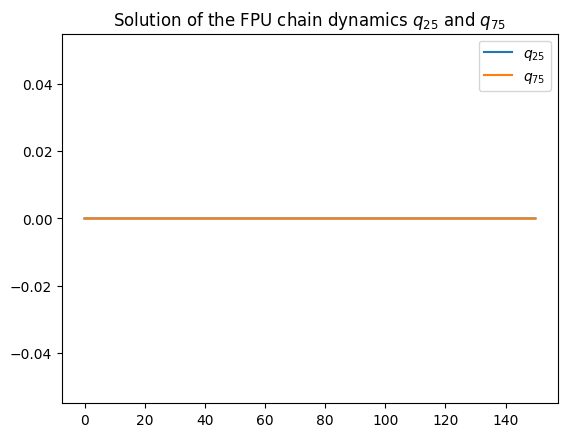

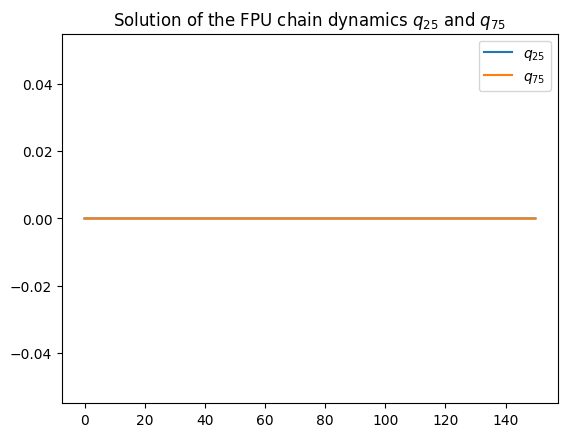

In [7]:
Toss=int(t_store.size/4)
q25_store=q25_store[Toss:-1,:] 
q75_store=q75_store[Toss:-1,:]
plt.figure(0)
plt.plot(t_store[Toss:]-t_store[Toss],q25_store[:,0], label=r"$q_{25}$")
plt.plot(t_store[Toss:]-t_store[Toss],q75_store[:,0], label=r"$q_{75}$")
plt.legend()
plt.title(r"Solution of the FPU chain dynamics $q_{25}$ and $q_{75}$")

plt.figure(1)
plt.plot(t_store[Toss:]-t_store[Toss],q25_store[:,1], label=r"$q_{25}$")
plt.plot(t_store[Toss:]-t_store[Toss],q75_store[:,1], label=r"$q_{75}$")
plt.legend()
plt.title(r"Solution of the FPU chain dynamics $q_{25}$ and $q_{75}$")

In [ ]:
import time 
import multiprocessing
def fun(ele): 
    ele**1000 
    

if __name__ == '__main__':
    input_list = [1000]*1000000 
    n = 250000 
    start_time = time.time() 
    pool = multiprocessing.Pool(4) 
    result = pool.map(func=fun, iterable=input_list, chunksize=n) 
    pool.close() 
    pool.join() 
    end_time = time.time() 
    print(end_time-start_time)

In [ ]:
#!/usr/bin/env python
# coding: utf-8



from multiprocessing import Pool, TimeoutError, cpu_count
import time
import os

def f(x):
    result = 0
    for i in range(10000):        
        result = x+result
    return result

if __name__ == '__main__':
    # start 64 worker processes
    with Pool(processes=4) as pool:

        print(pool.map(f, range(10000)))

        # print same numbers in arbitrary order
        for i in pool.imap_unordered(f, range(10000)):
            print(i)

        # evaluate "f(20)" asynchronously
        res = pool.apply_async(f, (20,))      # runs in *only* one process
        print(res.get(timeout=1))             # prints "400"

        # evaluate "os.getpid()" asynchronously
        res = pool.apply_async(os.getpid, ()) # runs in *only* one process
        print(res.get(timeout=1))             # prints the PID of that process

        # launching multiple evaluations asynchronously *may* use more processes
        multiple_results = [pool.apply_async(os.getpid, ()) for i in range(4)]
        print([res.get(timeout=1) for res in multiple_results])

        # make a single worker sleep for 10 seconds
        res = pool.apply_async(time.sleep, (10,))
        try:
            print(res.get(timeout=1))
        except TimeoutError:
            print("We lacked patience and got a multiprocessing.TimeoutError")

        print("For the moment, the pool remains available for more work")

    # exiting the 'with'-block has stopped the pool
    print("Now the pool is closed and no longer available")


In [ ]:
import time 
import multiprocessing
from multiprocessing import Pool, cpu_count
from functools import reduce
import math

def f(x):
    return reduce(lambda a, b: math.log(a+b), range(10**5), x)

if __name__ == '__main__':
    num_cores = int(cpu_count()/2)
    pool = Pool(processes= num_cores)            
    result = pool.map(f, range(10000000))  

In [ ]:
import time 
import multiprocessing
from multiprocessing import Pool, cpu_count
from multiprocessing.Pool import ThreadPool
from functools import reduce
import math

def f(x):
    return reduce(lambda a, b: math.log(a+b), range(10**5), x)

if __name__ == '__main__':
    n_cpu = int(cpu_count()/2)
    with ThreadPool(n_cpu) as pool:
        result = pool.map(f, range(10000000))  